In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv("concactenated sex and bmi.csv", index_col=0)
df.head()

,L-Alanine,L-Aspartic acid,L-Asparagine,Glucosamine|Galactosamine,Hydroxyhippurate,L-Carnitine,Ectoine,Corticosterone,Creatinine,Creatine,...,C9H16N2O4,C9H16O4,C9H18O9,C9H9NO4,C5H8O6,C12H16O6,Sex_Female,Sex_Male,BMI,Age
P1,-1.846172,0.484126,0.021412,0.861255,-0.173662,1.018054,-0.047993,-0.678022,0.590303,-1.261375,...,0.587633,0.379383,-0.084655,0.751380,-0.229849,-0.119829,0,1,-0.446405,27
P2,-0.443329,-0.877494,-0.061673,0.264052,-0.454759,-3.766291,1.083980,-0.221590,-0.329841,-0.501870,...,2.074760,-1.527215,-0.088695,0.641425,0.682707,-1.204619,1,0,-0.292573,33
P3,-0.134794,0.206897,0.104678,0.283471,-0.607615,0.736472,-0.409403,0.810842,0.119172,0.405288,...,-0.047189,1.119094,0.221023,0.700568,0.810287,-0.582386,1,0,-0.262084,34
P4,1.068429,-0.146876,-0.031757,0.368148,0.922386,1.818349,0.683843,1.115335,0.941316,1.794518,...,0.567404,0.873934,0.164568,1.194226,-0.240203,1.818600,1,0,0.536176,35
P5,0.459775,0.530521,0.103970,0.355795,-0.386900,1.087127,1.320936,0.888927,0.675092,0.413189,...,0.474926,-0.670962,0.207942,0.522442,0.003037,0.176705,1,0,0.852154,35


In [3]:
df['Age'] = df['Age'].map(lambda x: 1 if x>=16 else 0)
df.head()

,L-Alanine,L-Aspartic acid,L-Asparagine,Glucosamine|Galactosamine,Hydroxyhippurate,L-Carnitine,Ectoine,Corticosterone,Creatinine,Creatine,...,C9H16N2O4,C9H16O4,C9H18O9,C9H9NO4,C5H8O6,C12H16O6,Sex_Female,Sex_Male,BMI,Age
P1,-1.846172,0.484126,0.021412,0.861255,-0.173662,1.018054,-0.047993,-0.678022,0.590303,-1.261375,...,0.587633,0.379383,-0.084655,0.751380,-0.229849,-0.119829,0,1,-0.446405,1
P2,-0.443329,-0.877494,-0.061673,0.264052,-0.454759,-3.766291,1.083980,-0.221590,-0.329841,-0.501870,...,2.074760,-1.527215,-0.088695,0.641425,0.682707,-1.204619,1,0,-0.292573,1
P3,-0.134794,0.206897,0.104678,0.283471,-0.607615,0.736472,-0.409403,0.810842,0.119172,0.405288,...,-0.047189,1.119094,0.221023,0.700568,0.810287,-0.582386,1,0,-0.262084,1
P4,1.068429,-0.146876,-0.031757,0.368148,0.922386,1.818349,0.683843,1.115335,0.941316,1.794518,...,0.567404,0.873934,0.164568,1.194226,-0.240203,1.818600,1,0,0.536176,1
P5,0.459775,0.530521,0.103970,0.355795,-0.386900,1.087127,1.320936,0.888927,0.675092,0.413189,...,0.474926,-0.670962,0.207942,0.522442,0.003037,0.176705,1,0,0.852154,1


Adjust based on sex and bmi

In [4]:
from sklearn.linear_model import LinearRegression

X = df[["Sex_Female", "Sex_Male", "BMI"]]

for i in range(0, 770):
    y = df.iloc[:,i]
    model = LinearRegression().fit(X, y)
    df.iloc[:, i] = y - model.predict(X)

print(df.iloc[:, 770])
df.head()

P1      0
P2      1
P3      1
P4      1
P5      1
       ..
P264    1
P265    1
P266    1
P267    1
P268    1
Name: Sex_Female, Length: 268, dtype: int64


,L-Alanine,L-Aspartic acid,L-Asparagine,Glucosamine|Galactosamine,Hydroxyhippurate,L-Carnitine,Ectoine,Corticosterone,Creatinine,Creatine,...,C9H16N2O4,C9H16O4,C9H18O9,C9H9NO4,C5H8O6,C12H16O6,Sex_Female,Sex_Male,BMI,Age
P1,-1.870348,0.325436,-0.093506,1.043223,0.046746,0.744444,-0.197559,-0.733739,0.505004,-1.145949,...,0.588139,0.567625,0.125033,0.927934,-0.086406,-0.148025,0,1,-0.446405,1
P2,-0.343053,-0.768804,-0.003755,0.157708,-0.437031,-3.639361,1.206455,-0.070905,-0.012672,-0.624887,...,2.157630,-1.601811,-0.185951,0.582638,0.486404,-1.157331,1,0,-0.292573,1
P3,-0.039500,0.314275,0.162833,0.177586,-0.597702,0.864595,-0.289309,0.954639,0.420856,0.285736,...,0.030931,1.042951,0.122851,0.639690,0.620771,-0.536929,1,0,-0.262084,1
P4,1.033282,-0.073839,0.032628,0.274287,0.727701,1.977703,0.741607,1.078783,0.837556,1.765690,...,0.521175,0.757261,0.042431,1.078620,-0.252024,1.816115,1,0,0.536176,1
P5,0.372996,0.589965,0.170819,0.266694,-0.662572,1.258845,1.354029,0.780987,0.410845,0.420273,...,0.379475,-0.803678,0.076320,0.385173,0.061554,0.155242,1,0,0.852154,1


In [5]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Assuming df is your DataFrame
X = df.iloc[:, :770].values
y = df.iloc[:, -1].values

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=5, test_size=0.2)

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=5)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Initialize and train the classifier with the best parameters
best_rf = RandomForestClassifier(**best_params, random_state=5)
best_rf.fit(X_train, y_train)

# Predict on the validation set
y_pred = best_rf.predict(X_val)

# Classification Metrics
accuracy = accuracy_score(y_val, y_pred)
report = classification_report(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(conf_matrix)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Accuracy: 94.44%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.94      1.00      0.97        50

    accuracy                           0.94        54
   macro avg       0.97      0.62      0.69        54
weighted avg       0.95      0.94      0.93        54

Confusion Matrix:
[[ 1  3]
 [ 0 50]]


In [7]:
import pickle

with open("best_param_classifier", "wb") as file:
    pickle.dump(best_params, file)

print(best_params)

{'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


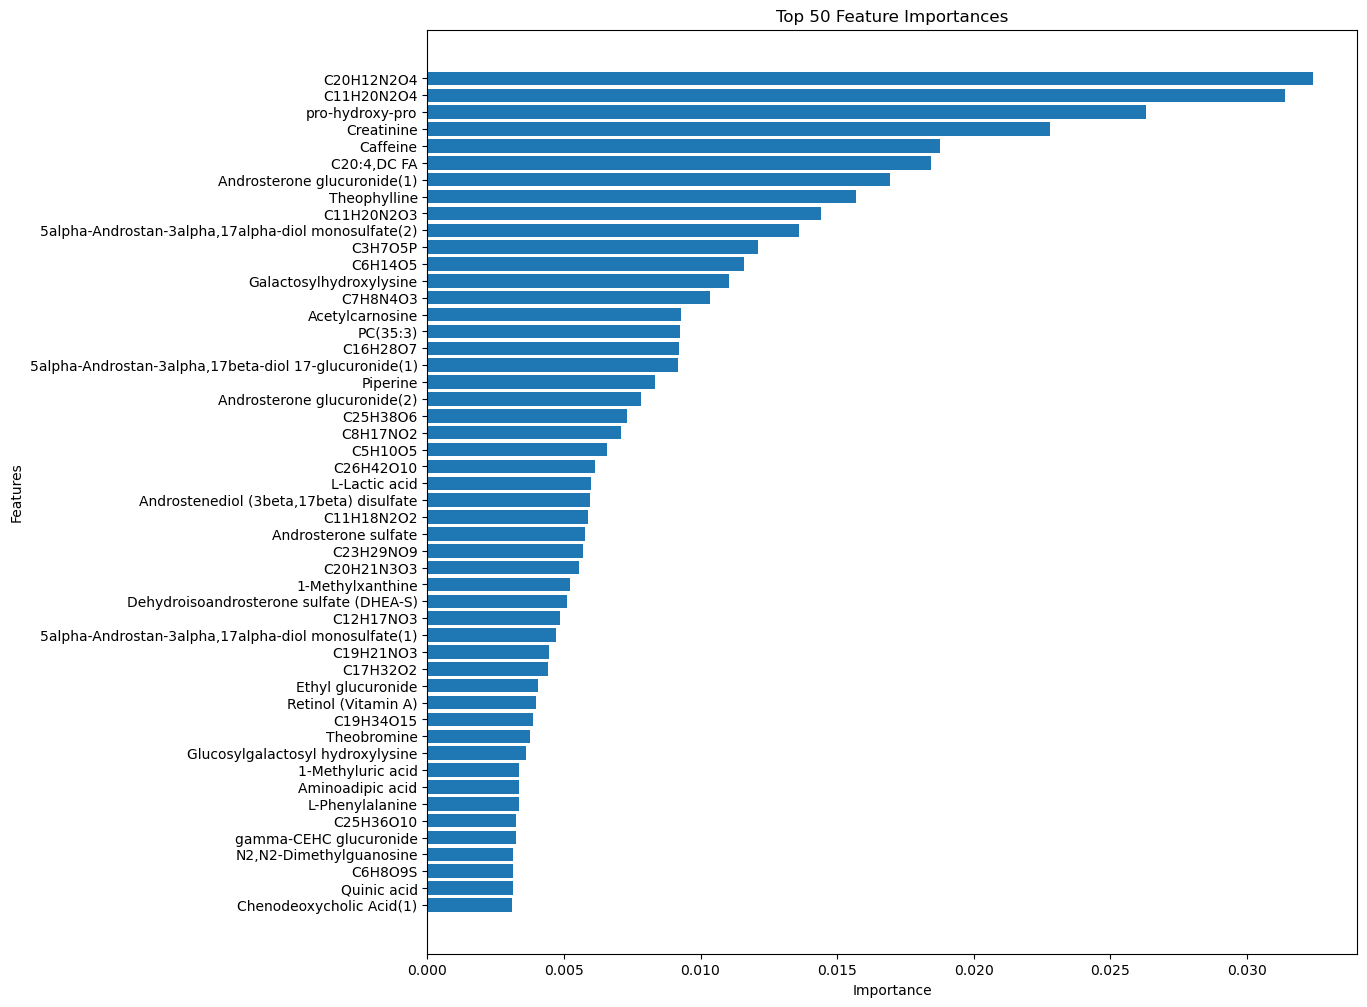

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming best_rf is your trained RandomForestClassifier model with best parameters
# and assuming df is your original DataFrame

# Get feature importances
importances = best_rf.feature_importances_

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame(importances, index=df.columns[:770], columns=['Importance']).sort_values('Importance', ascending=False)

# Get top 50 important features
top_50_features = feature_importances.head(50)

# Sort top 50 features in ascending order for better visualization
top_50_features_sorted = top_50_features.sort_values('Importance', ascending=True)

# Plot top 50 features
plt.figure(figsize=(12, 12))
plt.title('Top 50 Feature Importances')
plt.barh(top_50_features_sorted.index, top_50_features_sorted['Importance'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# If you want to save these top 50 features to a CSV
# top_50_features.to_csv("top_50_features.csv")
